In [59]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import animation

%matplotlib inline
%matplotlib ipympl

In [60]:

x_n = 50
y_n = 50

c = np.array([
    [0, 1, 0, -1, 0, 1, -1, -1, 1],
    [0, 0, 1, 0, -1, 1, 1, -1, -1]
]).T

w = np.array([4/9, 1/9, 1/9, 1/9, 1/9, 1/36, 1/36, 1/36, 1/36])
omega = 1.5

In [61]:

f = np.einsum('i,jk->ijk',w,np.ones((x_n,y_n)))
f = f/2
f[:, 20:30, 20:30] = f[:,20:30 , 20:30] * 2
np.shape(f)


(9, 50, 50)

In [62]:
rho = np.einsum('xyz->yz',f)
np.shape(rho)

(50, 50)

In [63]:
mass = np.einsum('xy->',rho)
mass

1300.0000000000002

In [64]:
# fig, ax = plt.subplots()
# ax1 = ax.imshow(rho)
# fig.colorbar(ax1)
# plt.show()

In [65]:
u = np.einsum('xyz,xi->iyz',f,c) / rho
np.shape(u)

(2, 50, 50)

In [66]:
u_x = u[0]
u_y = u[1]
np.shape(u_x)

(50, 50)

In [67]:
# fig, ax = plt.subplots()
# ax1 = ax.imshow(u_x)
# fig.colorbar(ax1)
# plt.show()

In [68]:
# fig, ax = plt.subplots()
# ax1 = ax.imshow(u_y)
# fig.colorbar(ax1)
# plt.show()

In [69]:
def stream(f):
    for i in range(1, 9):
        f[i] = np.roll(f[i], c[i], axis=(0, 1))

# stream(f)
rho = np.einsum('xyz->yz',f)
u = np.einsum('xyz,xi->iyz',f,c) / rho

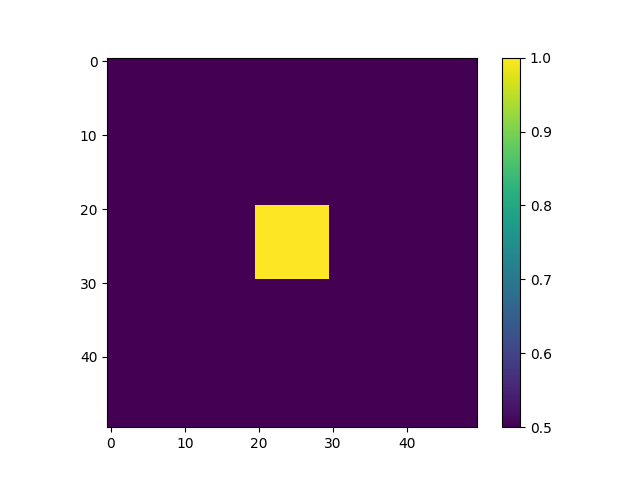

In [70]:
fig, ax = plt.subplots()
ax1 = ax.imshow(rho)
fig.colorbar(ax1)
plt.show()

In [71]:
mass2 = np.einsum('xy->',rho)
mass2

1300.0000000000002

In [72]:
def equilibrium(rho, u):
    cu = np.dot(u.T, c.T).T
    uu = np.sum(u**2, axis=0)
    return (w*(rho*(1 + 3*cu + 9/2*cu**2 - 3/2*uu)).T).T


In [73]:
f_eq = equilibrium(rho,u)
np.shape(f_eq)

(9, 50, 50)

In [74]:
def collide(f , omega):
    rho = np.einsum('xyz->yz',f)
    u = np.einsum('xyz,xi->iyz',f,c) / rho
    f += omega*(equilibrium(rho , u) - f)
    return rho , u


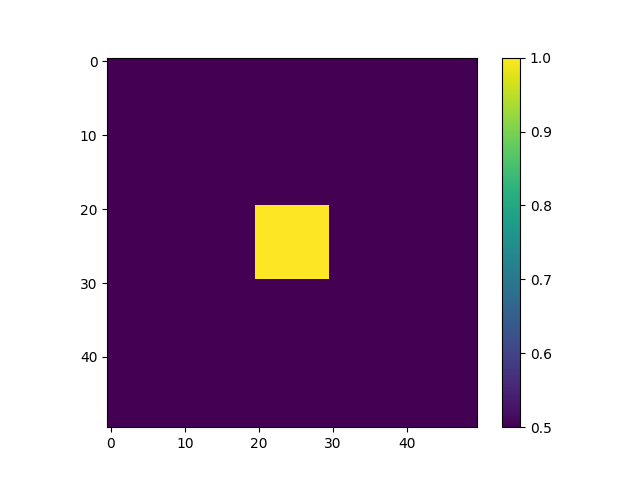

In [75]:
rho, u = collide(f, omega)
fig, ax = plt.subplots()
ax1 = ax.imshow(rho)
fig.colorbar(ax1)
plt.show()

In [76]:
# tao = 0.0001 #?????
# forward_diff = np.diff(f)/tao
# forward_diff = -(f - f_eq)/tao

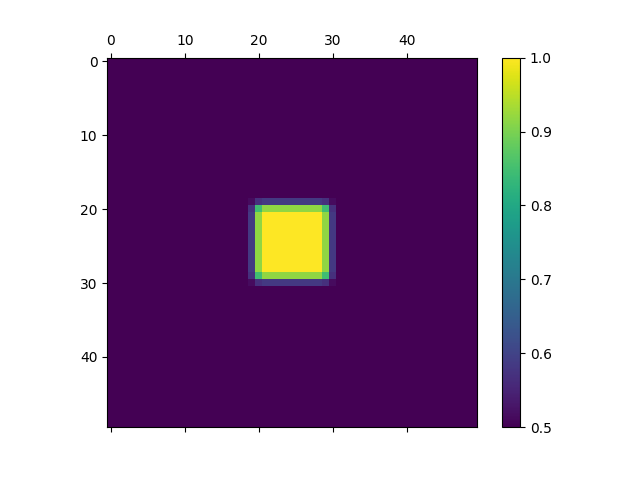

In [77]:
f_anim = f

def generate_data():
    stream(f_anim)
    rho_anim, u_anim = collide(f_anim, omega)
    return rho_anim

def update(data):
    mat.set_data(data)
    return mat 

def data_gen():
    while True:
        yield generate_data()

fig, ax = plt.subplots()
mat = ax.matshow(generate_data())
fig.colorbar(mat)
anim = animation.FuncAnimation(fig, update, data_gen, interval=500,  save_count=10)

plt.show()